In [6]:
import numpy as np
import pandas as pd
import pickle

from scipy import stats

import glob

In [7]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(-1, '/mnt/x/Computation/Utilities')

import ocu_seaside.ocu_basics as se
import ocu_seaside.ocu_visuals as viz
import ocu_chisel as chis
import ocu_binmeths as bm

import matplotlib.pyplot as plt

import os
os.chdir('/mnt/x/Computation/Projects/CS3-YY1/data/R2')

In [8]:
import ocu_trident.ocu_tri_utils as tu
import ocu_trident.ocu_deepstarr as ds
import ocu_trident.ocu_preassembled as pa
import ocu_oyster as oys

In [9]:
tomain = '../../../../'

hg38folder = tomain + 'Essentials/hg38/'
hg38_id, hg38_sizes = se.PickleLoad(hg38folder + 'hg38_id_sizes')
hg38_basic_id, hg38_basic_sizes = se.PickleLoad(hg38folder + 'hg38_basic_id_sizes')
hg38_auto_ids = hg38_basic_id[:-3]


encodefolder = se.NewFolder(tomain + 'data/!ENCODE')

data_source = pd.read_excel(encodefolder + 'Dataset_Identifiers.xlsx')

bamfolder = se.NewFolder(encodefolder + 'bam')
peaksfolder = se.NewFolder(encodefolder + 'peaks')
curfolder = se.NewFolder(encodefolder + 'currents')
procfolder = se.NewFolder(curfolder + 'processed')

fullfolder = se.NewFolder(curfolder + 'full') 
lowerfolder = se.NewFolder(curfolder + 'lowres') 
autosfolder = se.NewFolder(curfolder + 'autos')
winfolder = se.NewFolder(curfolder + 'win')

##################################################

lowestres = 10
CTreso = 50

window = 200 #average size of fragments abouts

##################################################

# YY1 Peaks

In [5]:
# !macs3 callpeak -t `ls ./../../data/!ENCODE/bam/YY1*.bam` -c `ls ./../../data/!ENCODE/bam/Input_BGG*.bam` -f BAM -g hs -q 0.001 -n YY1 --outdir ./peaks/YY1 --call-summits

# YY1 and Histone Tracks

In [10]:
# I want pairs of its target and its input. 

subjects = ['yy1', 'histone']

pairs = np.concatenate([data_source[data_source['target_type'] == tar][['target', 'control']].drop_duplicates().to_numpy()
         for tar in subjects])

targets = np.unique(pairs)

print(pairs)
print(targets)

[['YY1' 'Input_BGG']
 ['H3K4me3' 'Input_AKY']
 ['H3K27ac' 'Input_AKY']
 ['H3K27me3' 'Input_AKY']
 ['H3K4me1' 'Input_AKY']
 ['H3K36me3' 'Input_AKY']
 ['H3K9me3' 'Input_AKY']
 ['H3K9ac' 'Input_AKY']
 ['H3K4me2' 'Input_AKY']
 ['H4K20me1' 'Input_AKY']
 ['H2AFZ' 'Input_AKY']
 ['H3K79me2' 'Input_AKY']]
['H2AFZ' 'H3K27ac' 'H3K27me3' 'H3K36me3' 'H3K4me1' 'H3K4me2' 'H3K4me3'
 'H3K79me2' 'H3K9ac' 'H3K9me3' 'H4K20me1' 'Input_AKY' 'Input_BGG' 'YY1']


In [10]:
# predictd stuff

# !macs3 predictd -i `ls ./../../data/!ENCODE/bam/YY1_Rep1.bam` -g hs --outdir ./peaks/YY1/predictd/Rep1
# !macs3 predictd -i `ls ./../../data/!ENCODE/bam/YY1_Rep2.bam` -g hs --outdir ./peaks/YY1/predictd/Rep2

# !macs3 predictd -i `ls ./../../data/!ENCODE/bam/Input_BGG_Rep1.bam` -g hs --outdir ./peaks/Input_BGG/predictd/Rep1
# !macs3 predictd -i `ls ./../../data/!ENCODE/bam/Input_BGG_Rep2.bam` -g hs --outdir ./peaks/Input_BGG/predictd/Rep2
# !macs3 predictd -i `ls ./../../data/!ENCODE/bam/Input_BGG_Rep3.bam` -g hs --outdir ./peaks/Input_BGG/predictd/Rep3

# !for r in Rep1 Rep2; do for h in H3K4me3 H3K27ac H3K27me3 H3K4me1 H3K36me3 H3K9me3 H3K9ac H3K4me2 H4K20me1 H2AFZ H3K79me2; do macs3 predictd -i `ls ./../../data/!ENCODE/bam/"$h"_"$r"*.bam` -g hs --outdir ./peaks/$h/$r/predictd; done; done
# !for r in Rep1 Rep2 Rep3; do for h in Input_AKY Input_BGG; do macs3 predictd -i `ls ./../../data/!ENCODE/bam/"$h"_"$r"*.bam` -g hs --outdir ./peaks/$h/$r/predictd; done; done

In [30]:
# for index, row in data_source[data_source['target'].isin(targets)].iterrows(): 
#     target, rep, newid, read, predd = row['target'], row['rep'], row['newid'], row['read'], row['predictd']

#     paio, readl = (True, None) if read == 'Paired' else (False, int(predd))
#     print(readl)

#     fpath = fullfolder + target + '_' + str(rep) + '_' + 'full'
#     lrpath = lowerfolder + target + '_' + str(rep) + '_' + 'lowres'
#     autopath = autosfolder + target + '_' + str(rep) + '_' + 'autos'

#     if os.path.exists(fpath + '.p') is False: 

#         full = chis.Bam2Current(bamfolder + newid + '.bam', hg38_sizes, hg38_id, select_BS_ids = hg38_basic_id, 
#                         newreso = lowestres, resomode = np.mean, stranded = False, 
#                         read_length = readl, paired = paio, 
#                         make_index = True, dtype = np.float32)
    
#         se.PickleDump(full, fpath)
    
#     if os.path.exists(lrpath + '.p') is False: 

#         full = se.PickleLoad(fpath)

#         lower = chis.LowerResCurrent(full, lowestres, CTreso, resomode = np.mean, dtype = np.float32)

#         se.PickleDump(lower, lrpath)
    
#     if os.path.exists(autopath + '.p') is False: 

#         lower = se.PickleLoad(lrpath)

#         autoz = chis.CurrentSelect(lower, hg38_basic_id, hg38_auto_ids)

#         se.PickleDump(autoz, autopath)

#     print(f'finished {target}, {rep}')

In [31]:
# # for each file we smooth by mean, then we remove blacklist regions, then we scale to total score. 

# hg38_basic_BLC_LR50 = se.PickleLoad(hg38folder + 'hg38_basic_BLC_LR50') #0s are bad

# for index, row in data_source[data_source['target'].isin(targets)].iterrows(): 
#     target, rep, newid, read, predd = row['target'], row['rep'], row['newid'], row['read'], row['predictd']

#     autopath = autosfolder + target + '_' + str(rep) + '_' + 'autos'

#     winpath = winfolder + target + '_' + str(rep) + '_' + 'win'

#     if os.path.exists(winpath + '.p') is False:

#         autos = se.PickleLoad(autopath)
        
#         win = chis.CurrentWindower(autos, reso = CTreso, mode = np.mean, window = window, 
#                                 center = 0, extend = 0, dtype = np.float32, indiv = True)
        
#         win2 = chis.CurrentModifier(win, hg38_basic_BLC_LR50,
#                                 mode = np.multiply, dtype = np.float32, single = False)
        
#         se.PickleDump(win2, winpath)

In [35]:
# for t in targets: 
#     reps = [1,2,3] if 'Input' in t else [1,2]

#     print(t)

    # targ_vals = chis.Currents2Current([se.PickleLoad(winfolder + t + '_' + str(rep) + '_' + 'win')
    #                                 for rep in reps]) ####################
    
    # targ_vals_scaled = chis.CurrentScaler(targ_vals, rounds = 1, dtype = np.float64)

    # targ_vals_mean = chis.CurrentMerger(targ_vals, mode = np.mean, dtype = np.float32)

    # for d, s in zip([targ_vals_scaled, targ_vals_mean], 
    #                 [t + '_scaled', t + '_mean']):
        
    #     se.PickleDump(d, procfolder + s)

## Over Inputs

In [17]:
for papa in pairs: 

    targ_mean, inp_mean = [se.PickleLoad(procfolder + didi + '_mean') for didi in papa]

    targ_overinp_mode = [tu.BetaPrime_Mode(x, y) for x,y in zip(targ_mean, inp_mean)]

    targ_overinp_exp = [np.hstack([x,y]) for x,y in zip(targ_mean, inp_mean)]

    [se.PickleDump(x, procfolder + papa[0] + '_' + y) for x,y in zip([targ_overinp_mode, targ_overinp_exp], 
                                                                     ['mode', 'exp'])]

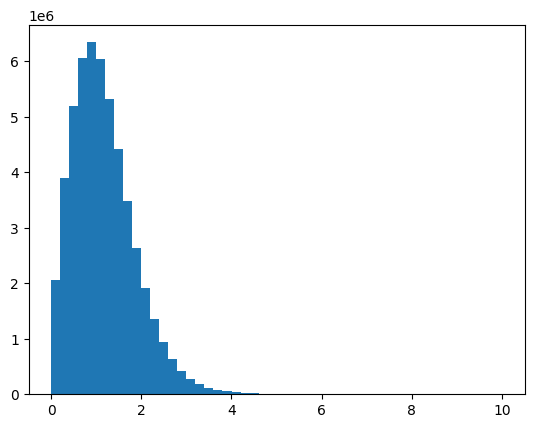

In [18]:
inp_mean_vals = np.vstack(inp_mean).reshape(-1)

inp_mean_vals_filt = inp_mean_vals[(inp_mean_vals > 0) * (inp_mean_vals < 10)]

plt.hist(inp_mean_vals_filt, bins = 50);

In [8]:
histones

NameError: name 'histones' is not defined

In [9]:
histones = data_source[data_source['target_type'] == 'histone']['target'].unique()
histones


array(['H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3',
       'H3K9ac', 'H3K4me2', 'H4K20me1', 'H2AFZ', 'H3K79me2'], dtype=object)

In [ ]:
his_mode = chis.Currents2Current([se.PickleLoad(procfolder + h + '_mode') for h in histones])

se.PickleDump(his_mode, procfolder + 'his_mode')

In [ ]:
his_inp_means = chis.Currents2Current([se.PickleLoad(procfolder + h + '_mode') for h in histones])

se.PickleDump(his_mode, procfolder + 'his_mode')

In [11]:
histones_inps = data_source[data_source['target_type'] == 'histone']['control'].unique()

In [12]:
histones_inps

array(['Input_AKY'], dtype=object)

In [14]:
data_source[data_source['target_type'] == 'histone']

,masterid,id,controlid,cell,target,target_type,control,rep,newid,file_type,out_type,genome,lab,read,predictd
3,ENCSR000AKU,ENCFF564SVK,ENCSR000AKY,K562,H3K4me3,histone,Input_AKY,1,H3K4me3_Rep1,bam,alignments,E4v151,BradleyBernstein,Single,200
4,ENCSR000AKU,ENCFF685PPQ,ENCSR000AKY,K562,H3K4me3,histone,Input_AKY,2,H3K4me3_Rep2,bam,alignments,E4v151,BradleyBernstein,Single,169
5,ENCSR000AKP,ENCFF121RHF,ENCSR000AKY,K562,H3K27ac,histone,Input_AKY,1,H3K27ac_Rep1,bam,alignments,E4v151,BradleyBernstein,Single,164
6,ENCSR000AKP,ENCFF907MNY,ENCSR000AKY,K562,H3K27ac,histone,Input_AKY,2,H3K27ac_Rep2,bam,alignments,E4v151,BradleyBernstein,Single,186
7,ENCSR000AKQ,ENCFF392ZKG,ENCSR000AKY,K562,H3K27me3,histone,Input_AKY,1,H3K27me3_Rep1,bam,alignments,E4v151,BradleyBernstein,Single,224
8,ENCSR000AKQ,ENCFF905CZD,ENCSR000AKY,K562,H3K27me3,histone,Input_AKY,2,H3K27me3_Rep2,bam,alignments,E4v151,BradleyBernstein,Single,165
9,ENCSR000AKS,ENCFF352HXD,ENCSR000AKY,K562,H3K4me1,histone,Input_AKY,1,H3K4me1_Rep1,bam,alignments,E4v151,BradleyBernstein,Single,163
10,ENCSR000AKS,ENCFF415GHS,ENCSR000AKY,K562,H3K4me1,histone,Input_AKY,2,H3K4me1_Rep2,bam,alignments,E4v151,BradleyBernstein,Single,227
11,ENCSR000AKR,ENCFF880HKV,ENCSR000AKY,K562,H3K36me3,histone,Input_AKY,1,H3K36me3_Rep1,bam,alignments,E4v151,BradleyBernstein,Single,193
12,ENCSR000AKR,ENCFF272JVI,ENCSR000AKY,K562,H3K36me3,histone,Input_AKY,2,H3K36me3_Rep2,bam,alignments,E4v151,BradleyBernstein,Single,221
